# EDA extensive exploratory data analysis

In [2]:
#head packages import
import gc
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

pd.set_option('display.max_columns' ,30) #setting as None for all row and cols
pd.set_option('display.max_rows' , 10)

train_x = np.load("Training data/X_train.npy")
train_y = np.load("Training data/y_train.npy")
test_x  = np.load("Testing data/X_test.npy")

1. 数据总览

In [3]:
train_x = pd.DataFrame(train_x).rename(columns={i: f"x_{i}" for i in range(111)})
train_y = pd.DataFrame(train_y).rename(columns={i: f"y_{i}" for i in range(11)})


test_x = pd.DataFrame(test_x).rename(columns={i: f"x_{i}" for i in range(111)})
pd.concat([train_x.head(), train_x.tail()])

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,...,x_96,x_97,x_98,x_99,x_100,x_101,x_102,x_103,x_104,x_105,x_106,x_107,x_108,x_109,x_110
0,57.0,5.0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,1.0,3.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1,71.0,2.0,2.0,NaN,NaN,2.0,NaN,3.0,0.0,7.0,4.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,NaN,NaN,5.0,NaN,NaN,4.0,0.0,0.0,0.0,0.0,0.0,1.0
2,64.0,2.0,0.0,NaN,NaN,2.0,NaN,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,7.0,2.0,4.0,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
3,74.0,1.0,1.0,6.0,2.0,2.0,NaN,2.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,4.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,74.0,2.0,0.0,6.0,2.0,0.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,8.0,0.0,6.0,0.0,5.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0
995,86.0,4.0,0.0,0.0,0.0,0.0,NaN,2.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,5.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,91.0,3.0,0.0,0.0,0.0,0.0,NaN,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,3.0,NaN,5.0,0.0,NaN,3.0,0.0,0.0,0.0,0.0,0.0,0.0
997,46.0,4.0,0.0,0.0,2.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,2.0,5.0,0.0,1.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0
998,70.0,2.0,1.0,2.0,2.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,5.0,2.0,4.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
999,60.0,2.0,0.0,0.0,0.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,2.0,5.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0


In [4]:
train_y

,y_0,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,1,1,1
4,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,1,0,0,1,0,0,0,0
996,0,0,0,0,1,0,1,0,0,1,1
997,0,1,0,1,1,0,0,1,1,0,1
998,0,1,0,1,1,0,0,0,0,0,0


In [5]:
train_x.describe()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,...,x_96,x_97,x_98,x_99,x_100,x_101,x_102,x_103,x_104,x_105,x_106,x_107,x_108,x_109,x_110
count,995.000000,1000.000000,998.000000,933.000000,954.000000,966.000000,37.0,995.000000,996.000000,847.000000,966.000000,984.000000,984.0,984.000000,984.000000,...,618.000000,997.000000,997.000000,932.000000,918.000000,993.000000,931.000000,919.000000,995.000000,996.000000,995.000000,992.000000,992.000000,993.000000,993.000000
mean,65.179899,3.657000,0.444890,2.260450,1.190776,1.083851,0.0,1.413065,0.026104,3.341204,0.166667,0.006098,0.0,0.006098,0.013211,...,0.231392,0.066199,0.396189,3.084764,3.037037,3.290030,0.068743,2.968444,3.290452,0.072289,0.407035,0.428427,0.444556,0.011078,0.125881
std,11.492400,1.825564,0.816375,2.479035,1.053291,0.872260,0.0,1.083640,0.159526,3.121343,0.634228,0.077888,0.0,0.077888,0.114237,...,0.422064,0.248754,0.777769,1.782570,1.702760,1.827344,0.364560,1.758293,1.872994,0.259096,0.491529,0.495100,0.497167,0.104718,0.331883
min,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,66.000000,3.000000,0.000000,1.000000,2.000000,1.000000,0.0,2.000000,0.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,73.000000,5.000000,1.000000,5.000000,2.000000,2.000000,0.0,2.000000,0.000000,7.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,1.000000,4.000000,4.000000,4.000000,0.000000,4.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,97.000000,13.000000,3.000000,6.000000,4.000000,2.000000,0.0,3.000000,1.000000,7.000000,4.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,4.000000,10.000000,11.000000,10.000000,3.000000,9.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 111 entries, x_0 to x_110
dtypes: float64(111)
memory usage: 867.3 KB


2. 查看数据缺失和异常

In [7]:
cols = [f"x_{i}" for i in range(111)]
data = pd.concat([train_x, test_x])

tmp = pd.DataFrame()
tmp['count'] = data[cols].count().values
tmp['missing_rate'] = (data.shape[0] - tmp['count']) / data.shape[0]
tmp['nunique'] = data[cols].nunique().values
tmp.index = cols
tmp
#每一维的类别个数, 缺失率, 异常值

,count,missing_rate,nunique
x_0,1692,0.004706,65
x_1,1700,0.000000,12
x_2,1696,0.002353,4
x_3,1594,0.062353,7
x_4,1627,0.042941,4
...,...,...,...
x_106,1687,0.007647,2
x_107,1683,0.010000,2
x_108,1683,0.010000,2
x_109,1684,0.009412,2


a:\16_Environments\2_Python\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='x_1'>

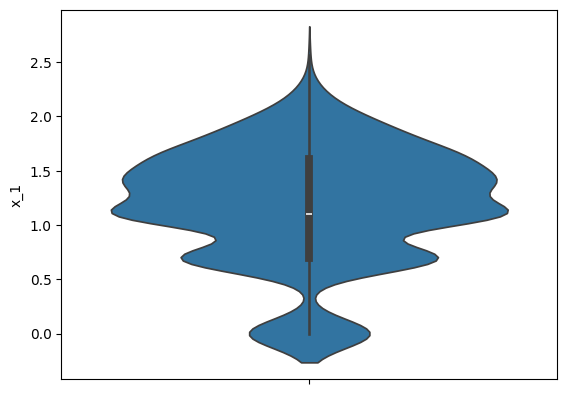

In [8]:
sns.violinplot(np.log(train_x["x_1"]))

3. 查看预测值的分布

a:\16_Environments\2_Python\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


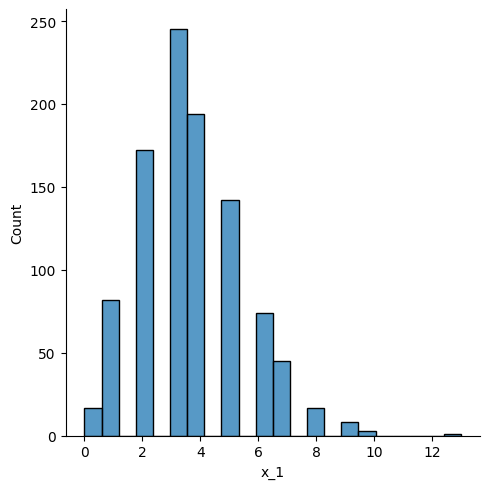

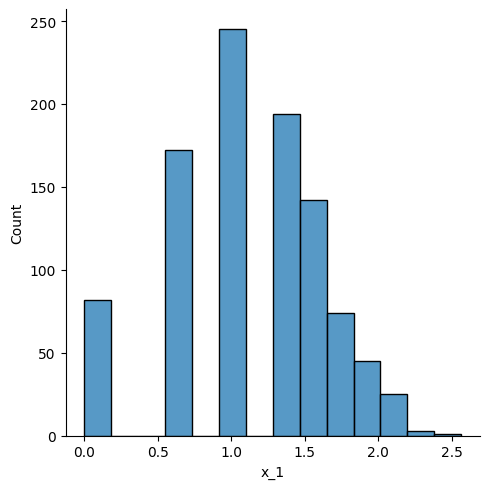

In [9]:
sns.displot(train_x["x_1"])
sns.displot(np.log(train_x["x_1"]))

4. 数值型特征分析

In [10]:
pd.set_option('display.max_rows' , 10)
# 查看偏度和峰度
tmp = pd.DataFrame(index = cols)
for col in cols:
    tmp.loc[col, 'train_Skewness'] = train_x[col].skew()
    tmp.loc[col, 'test_Skewness'] = test_x[col].skew()
    tmp.loc[col, 'train_Kurtosis'] = train_x[col].kurt()
    tmp.loc[col, 'test_Kurtosis'] = test_x[col].kurt()
tmp

#从下面结果来看 有些偏度 和峰度很不一致, 我们应该要转换一下 (需要查下方法)

,train_Skewness,test_Skewness,train_Kurtosis,test_Kurtosis
x_0,-0.172637,-0.250804,-0.313356,0.045840
x_1,0.652389,0.541898,0.783468,0.374830
x_2,1.779331,1.731573,2.142364,1.877772
x_3,0.475495,0.487082,-1.462243,-1.490582
x_4,-0.095145,0.008162,-1.523081,-1.502880
...,...,...,...,...
x_106,0.379030,0.328737,-1.860079,-1.897424
x_107,0.289708,0.207042,-1.919944,-1.962823
x_108,0.223488,0.165903,-1.953997,-1.978210
x_109,9.356727,9.805188,85.720983,94.414984


In [11]:
#特征x与 目标变量y_j 之前的相关性分析
data_train = pd.concat([train_x, train_y], axis=1)
correlation = data_train[cols + ['y_0']].corr()
correlation['y_0'].sort_values()

#特征x 相互之间的关系可视化 这个不要分析, 复杂度太高 算不出来 111 * 111个图需要
# sns.pairplot(data_train[cols])

x_82   -0.078331
x_28   -0.074184
x_52   -0.066931
x_83   -0.066285
x_37   -0.060371
          ...   
x_51         NaN
x_61         NaN
x_66         NaN
x_77         NaN
x_80         NaN
Name: y_0, Length: 112, dtype: float64

5. 类别特征分析

In [12]:
#查看类别个数及其分布情况
# 类别倾斜非常严重的可以删掉 我们的比如x_6 x_8, x_11...
for col in cols:
    col
    train_x[col].value_counts()

'x_0'

x_0
65.0    49
66.0    47
68.0    38
64.0    36
69.0    35
        ..
94.0     2
92.0     1
40.0     1
34.0     1
97.0     1
Name: count, Length: 61, dtype: int64

'x_1'

x_1
3.0     245
4.0     194
2.0     172
5.0     142
1.0      82
       ... 
0.0      17
8.0      17
9.0       8
10.0      3
13.0      1
Name: count, Length: 12, dtype: int64

'x_2'

x_2
0.0    723
1.0    146
2.0     89
3.0     40
Name: count, dtype: int64

'x_3'

x_3
0.0    442
6.0    196
2.0     83
3.0     72
5.0     66
4.0     49
1.0     25
Name: count, dtype: int64

'x_4'

x_4
2.0    511
0.0    407
3.0     30
4.0      6
Name: count, dtype: int64

'x_5'

x_5
2.0    411
0.0    330
1.0    225
Name: count, dtype: int64

'x_6'

x_6
0.0    37
Name: count, dtype: int64

'x_7'

x_7
2.0    529
0.0    348
3.0    115
1.0      3
Name: count, dtype: int64

'x_8'

x_8
0.0    970
1.0     26
Name: count, dtype: int64

'x_9'

x_9
0.0    338
7.0    257
6.0     94
5.0     42
3.0     39
2.0     36
1.0     32
4.0      9
Name: count, dtype: int64

'x_10'

x_10
0.0    883
1.0     42
2.0     16
3.0     13
4.0     12
Name: count, dtype: int64

'x_11'

x_11
0.0    978
1.0      6
Name: count, dtype: int64

'x_12'

x_12
0.0    984
Name: count, dtype: int64

'x_13'

x_13
0.0    978
1.0      6
Name: count, dtype: int64

'x_14'

x_14
0.0    971
1.0     13
Name: count, dtype: int64

'x_15'

x_15
0.0    975
1.0      9
Name: count, dtype: int64

'x_16'

x_16
0.0    984
Name: count, dtype: int64

'x_17'

x_17
0.0    983
1.0      1
Name: count, dtype: int64

'x_18'

x_18
0.0    988
Name: count, dtype: int64

'x_19'

x_19
0.0    987
1.0      1
Name: count, dtype: int64

'x_20'

x_20
0.0    983
1.0      5
Name: count, dtype: int64

'x_21'

x_21
0.0    988
Name: count, dtype: int64

'x_22'

x_22
0.0    986
1.0      2
Name: count, dtype: int64

'x_23'

x_23
0.0    988
Name: count, dtype: int64

'x_24'

x_24
0.0    987
1.0      1
Name: count, dtype: int64

'x_25'

x_25
0.0    928
1.0     70
Name: count, dtype: int64

'x_26'

x_26
0.0    985
1.0     13
Name: count, dtype: int64

'x_27'

x_27
0.0    994
1.0      4
Name: count, dtype: int64

'x_28'

x_28
0.0    946
1.0     51
Name: count, dtype: int64

'x_29'

x_29
0.0    961
1.0     36
Name: count, dtype: int64

'x_30'

x_30
0.0    977
1.0     20
Name: count, dtype: int64

'x_31'

x_31
0.0    997
Name: count, dtype: int64

'x_32'

x_32
0.0    987
1.0     10
Name: count, dtype: int64

'x_33'

x_33
140.0    56
160.0    44
130.0    39
120.0    38
110.0    27
         ..
50.0      2
40.0      2
240.0     1
0.0       1
135.0     1
Name: count, Length: 27, dtype: int64

'x_34'

x_34
82.0     35
84.0     18
92.0     17
91.0     17
85.0     17
         ..
5.0       1
125.0     1
108.0     1
50.0      1
51.0      1
Name: count, Length: 69, dtype: int64

'x_35'

x_35
132.0    39
143.0    36
134.0    35
123.0    32
133.0    29
         ..
199.0     1
186.0     1
157.0     1
5.0       1
0.0       1
Name: count, Length: 129, dtype: int64

'x_36'

x_36
82.0     75
81.0     59
83.0     55
84.0     50
92.0     44
         ..
41.0      1
3.0       1
115.0     1
135.0     1
142.0     1
Name: count, Length: 86, dtype: int64

'x_37'

x_37
3.0    232
2.0    206
4.0    168
1.0    146
5.0    100
6.0     56
0.0     48
7.0     24
8.0     11
9.0      2
Name: count, dtype: int64

'x_38'

x_38
0.0    974
1.0     18
Name: count, dtype: int64

'x_39'

x_39
0.0    958
1.0     33
Name: count, dtype: int64

'x_40'

x_40
0.0    991
1.0      2
Name: count, dtype: int64

'x_41'

x_41
0.0    989
1.0      4
Name: count, dtype: int64

'x_42'

x_42
0.0    988
1.0      5
Name: count, dtype: int64

'x_43'

x_43
0.0    479
4.0    285
1.0    149
2.0     23
3.0     13
Name: count, dtype: int64

'x_44'

x_44
0.0    455
1.0    384
2.0     45
3.0     40
4.0     26
Name: count, dtype: int64

'x_45'

x_45
0.0    614
2.0    110
4.0    109
3.0     71
1.0     48
Name: count, dtype: int64

'x_46'

x_46
0.0    869
1.0     32
2.0     26
3.0     23
4.0      7
Name: count, dtype: int64

'x_47'

x_47
0.0    999
1.0      1
Name: count, dtype: int64

'x_48'

x_48
0.0    516
1.0    388
Name: count, dtype: int64

'x_49'

x_49
0.0    872
1.0     32
Name: count, dtype: int64

'x_50'

x_50
0.0    893
1.0     11
Name: count, dtype: int64

'x_51'

x_51
0.0    904
Name: count, dtype: int64

'x_52'

x_52
0.0    785
1.0    119
Name: count, dtype: int64

'x_53'

x_53
0.0    887
1.0     17
Name: count, dtype: int64

'x_54'

x_54
0.0    906
1.0     25
Name: count, dtype: int64

'x_55'

x_55
0.0    930
1.0      1
Name: count, dtype: int64

'x_56'

x_56
0.0    860
1.0     71
Name: count, dtype: int64

'x_57'

x_57
0.0    907
1.0     24
Name: count, dtype: int64

'x_58'

x_58
0.0    905
1.0     26
Name: count, dtype: int64

'x_59'

x_59
0.0    922
1.0      9
Name: count, dtype: int64

'x_60'

x_60
0.0    930
1.0      1
Name: count, dtype: int64

'x_61'

x_61
0.0    931
Name: count, dtype: int64

'x_62'

x_62
0.0    930
1.0      1
Name: count, dtype: int64

'x_63'

x_63
0.0    931
1.0      1
Name: count, dtype: int64

'x_64'

x_64
0.0    920
1.0     12
Name: count, dtype: int64

'x_65'

x_65
0.0    930
1.0      2
Name: count, dtype: int64

'x_66'

x_66
0.0    932
Name: count, dtype: int64

'x_67'

x_67
0.0    923
1.0      9
Name: count, dtype: int64

'x_68'

x_68
0.0    904
1.0     28
Name: count, dtype: int64

'x_69'

x_69
0.0    930
1.0      2
Name: count, dtype: int64

'x_70'

x_70
0.0    929
1.0      3
Name: count, dtype: int64

'x_71'

x_71
0.0    919
1.0     13
Name: count, dtype: int64

'x_72'

x_72
0.0    925
1.0      7
Name: count, dtype: int64

'x_73'

x_73
0.0    900
1.0     32
Name: count, dtype: int64

'x_74'

x_74
0.0    990
1.0      4
Name: count, dtype: int64

'x_75'

x_75
0.0    991
1.0      3
Name: count, dtype: int64

'x_76'

x_76
0.0    975
1.0     19
Name: count, dtype: int64

'x_77'

x_77
0.0    994
Name: count, dtype: int64

'x_78'

x_78
0.0    989
1.0      5
Name: count, dtype: int64

'x_79'

x_79
0.0    991
1.0      3
Name: count, dtype: int64

'x_80'

x_80
0.0    994
Name: count, dtype: int64

'x_81'

x_81
0.0    606
1.0    193
Name: count, dtype: int64

'x_82'

x_82
3.8    65
4.0    63
4.2    48
3.9    45
3.5    44
       ..
6.4     1
5.9     1
6.7     1
6.3     1
7.6     1
Name: count, Length: 45, dtype: int64

'x_83'

x_83
-0.043343    1
-0.041698    1
 0.224385    1
 0.050252    1
-0.029802    1
            ..
 0.038807    1
-0.153842    1
 0.983522    1
 0.185942    1
 0.104634    1
Name: count, Length: 796, dtype: int64

'x_84'

x_84
136.0    129
140.0    115
130.0     73
138.0     56
133.0     46
        ... 
149.0      1
118.0      1
159.0      1
148.0      1
169.0      1
Name: count, Length: 39, dtype: int64

'x_85'

x_85
 0.322413    1
 0.921106    1
 0.252597    1
 2.343939    1
 1.295286    1
            ..
 1.785827    1
 0.172629    1
-0.053540    1
 0.690450    1
 0.136997    1
Name: count, Length: 826, dtype: int64

'x_86'

x_86
 0.282843    1
 0.332187    1
 0.530785    1
 0.941414    1
 1.762619    1
            ..
 0.578471    1
-0.007098    1
 0.223805    1
 0.002681    1
 0.012564    1
Name: count, Length: 825, dtype: int64

'x_87'

x_87
-0.256597    1
-0.213824    1
Name: count, dtype: int64

'x_88'

x_88
2.182141     1
1.599453     1
3.553877     1
9.573040     1
9.206078     1
            ..
12.505346    1
10.070066    1
6.616168     1
10.119151    1
5.417421     1
Name: count, Length: 926, dtype: int64

'x_89'

x_89
 7.551507     1
 23.092061    1
 21.832462    1
 29.737802    1
-4.143068     1
             ..
-2.794521     1
 9.780398     1
 21.553147    1
 59.413012    1
-6.324395     1
Name: count, Length: 885, dtype: int64

'x_90'

x_90
 1.394320     1
 3.510136     1
-0.374116     1
 2.645824     1
 3.559304     1
             ..
 9.521371     1
 6.096310     1
 6.309652     1
 10.961696    1
-2.844337     1
Name: count, Length: 920, dtype: int64

'x_91'

x_91
0.0    862
1.0     63
2.0     49
3.0     17
Name: count, dtype: int64

'x_92'

x_92
0.0    897
2.0     26
1.0      8
Name: count, dtype: int64

'x_93'

x_93
0.0    907
2.0     12
1.0      1
Name: count, dtype: int64

'x_94'

x_94
0.0    394
1.0    235
Name: count, dtype: int64

'x_95'

x_95
0.0    351
1.0    257
Name: count, dtype: int64

'x_96'

x_96
0.0    475
1.0    143
Name: count, dtype: int64

'x_97'

x_97
0.0    931
1.0     66
Name: count, dtype: int64

'x_98'

x_98
0.0    743
1.0    147
2.0     80
3.0     20
4.0      7
Name: count, dtype: int64

'x_99'

x_99
2.0     227
3.0     174
4.0     174
1.0     120
5.0     104
       ... 
6.0      45
7.0      26
8.0       8
9.0       3
10.0      2
Name: count, Length: 11, dtype: int64

'x_100'

x_100
3.0     221
2.0     197
4.0     166
1.0     131
5.0      90
       ... 
7.0      17
8.0       8
9.0       2
11.0      1
10.0      1
Name: count, Length: 12, dtype: int64

'x_101'

x_101
2.0     220
3.0     190
4.0     185
5.0     119
1.0     116
       ... 
0.0      41
7.0      28
8.0      15
9.0       4
10.0      1
Name: count, Length: 11, dtype: int64

'x_102'

x_102
0.0    896
2.0     23
1.0      9
3.0      3
Name: count, dtype: int64

'x_103'

x_103
2.0    229
3.0    206
4.0    132
1.0    131
5.0     94
0.0     49
6.0     42
7.0     23
8.0      7
9.0      6
Name: count, dtype: int64

'x_104'

x_104
3.0     223
2.0     192
4.0     163
1.0     129
5.0     120
       ... 
0.0      43
7.0      41
8.0      12
9.0       7
10.0      1
Name: count, Length: 11, dtype: int64

'x_105'

x_105
0.0    924
1.0     72
Name: count, dtype: int64

'x_106'

x_106
0.0    590
1.0    405
Name: count, dtype: int64

'x_107'

x_107
0.0    567
1.0    425
Name: count, dtype: int64

'x_108'

x_108
0.0    551
1.0    441
Name: count, dtype: int64

'x_109'

x_109
0.0    982
1.0     11
Name: count, dtype: int64

'x_110'

x_110
0.0    868
1.0    125
Name: count, dtype: int64